## A Deep Learning model for House Price Predictions using Keras

Data from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains ~21000 house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,6/27/2014,1/15/2015,4/15/2015,3/12/2015
price,221900,538000,180000,604000,510000,1.23e+06,257500,291850,229500,323000
bedrooms,3,3,2,4,3,4,3,3,3,3
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560
floors,1,2,1,1,1,1,2,1,1,2
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Explarotay Analysis, Data Visualization

In [7]:
df.isnull().sum() # Check if there're missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

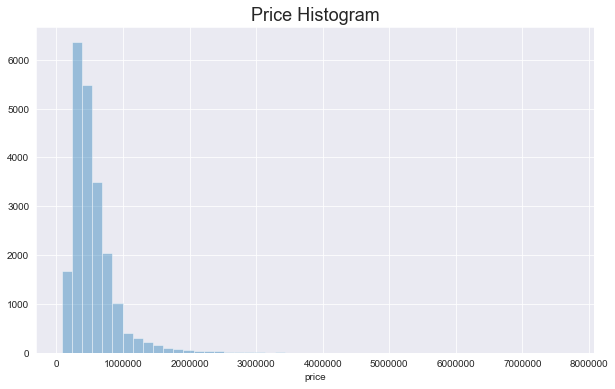

In [8]:
plt.figure(figsize=(10,6))
plt.title('Price Histogram', fontsize=18)
sns.distplot(df['price'], kde=False)

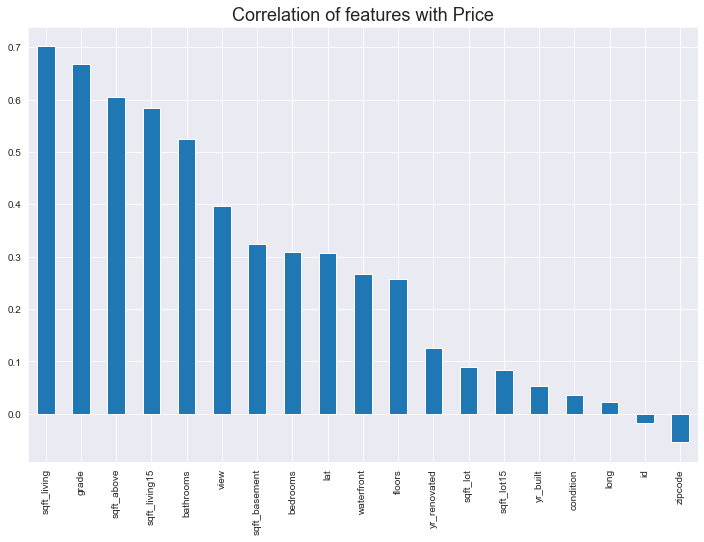

In [9]:
plt.figure(figsize=(12,8))
plt.title('Correlation of features with Price', fontsize=18)
df.corr()['price'].sort_values(ascending=False)[1:].plot(kind='bar')

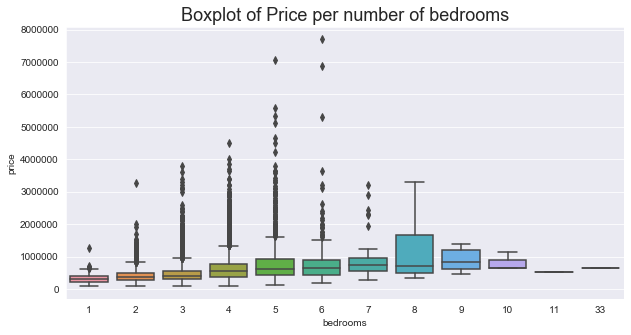

In [10]:
plt.figure(figsize=(10,5))
plt.title('Boxplot of Price per number of bedrooms', fontsize=18)
sns.boxplot(x='bedrooms',y='price',data=df)

In [11]:
len(df)*0.01

215.97

We will excluding the most expensive houses (top 1% of house prices), to improve the model in predicting an average house price

In [12]:
df = df.sort_values('price', ascending=False).iloc[216:]

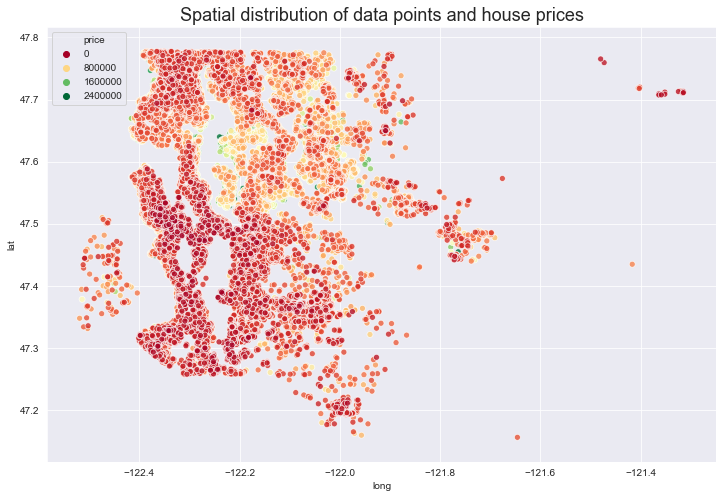

In [13]:
plt.figure(figsize=(12,8))
plt.title('Spatial distribution of data points and house prices', fontsize=18)
sns.scatterplot(x='long',y='lat',data=df, hue='price',
               alpha=0.8,palette='RdYlGn')

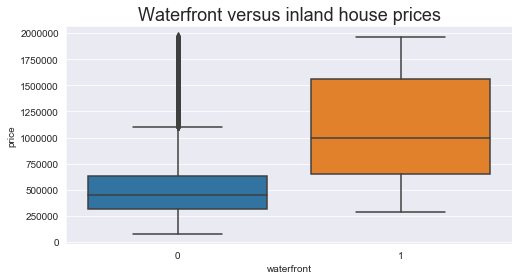

In [14]:
plt.figure(figsize=(8,4))
plt.title('Waterfront versus inland house prices', fontsize=18)
sns.boxplot(x='waterfront',y='price',data=df)

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df = df.drop('date', axis=1)

In [16]:
df = df.drop(['id','zipcode'],axis=1)

# Spliting Train/Test Data

In [17]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
X_train.shape

(14966, 19)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step
X_test = scaler.transform(X_test)

# Trainig a Deep Learning Neural Network Model

In [21]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [22]:
# Prevent overfitting
# Stops trainig when a certain critera is met
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We want to minimize the loss, so we choose mode='min'
# Patience = how many epochs to wait before stopping the training

In [23]:
model.fit(x=X_train, y=y_train,
         validation_data= (X_test,y_test), # Validatin data is not used in training the model so it doesn't leak test data
         callbacks=[early_stop], batch_size=128, epochs=100)

Train on 14966 samples, validate on 6415 samples
Epoch 1/100
14966/14966 [==============================] - 2s 136us/sample - loss: 346877191128.1785 - val_loss: 356882548473.2558
Epoch 2/100
14966/14966 [==============================] - 0s 23us/sample - loss: 346619401585.0670 - val_loss: 356137906961.9978
Epoch 3/100
14966/14966 [==============================] - 0s 25us/sample - loss: 344590494337.7961 - val_loss: 352093708388.8835
Epoch 4/100
14966/14966 [==============================] - 0s 31us/sample - loss: 337249052845.2439 - val_loss: 340252818671.9177
Epoch 5/100
14966/14966 [==============================] - 0s 29us/sample - loss: 319850238491.1634 - val_loss: 315712257092.7988
Epoch 6/100
14966/14966 [==============================] - 0s 28us/sample - loss: 288240111412.9242 - val_loss: 275362965196.5605
Epoch 7/100
14966/14966 [==============================] - 0s 28us/sample - loss: 241531776399.4462 - val_loss: 220983671100.3785
Epoch 8/100
14966/14966 [===============

Epoch 64/100
14966/14966 [==============================] - 0s 28us/sample - loss: 28648951989.1808 - val_loss: 29254343291.6302
Epoch 65/100
14966/14966 [==============================] - 0s 26us/sample - loss: 28419687110.2178 - val_loss: 28997458695.1433
Epoch 66/100
14966/14966 [==============================] - 0s 30us/sample - loss: 28196765408.9023 - val_loss: 28774015961.2109
Epoch 67/100
14966/14966 [==============================] - 1s 55us/sample - loss: 27992048718.9587 - val_loss: 28579503747.1327
Epoch 68/100
14966/14966 [==============================] - 1s 35us/sample - loss: 27798659736.2384 - val_loss: 28389520699.8996
Epoch 69/100
14966/14966 [==============================] - 0s 30us/sample - loss: 27616765769.4508 - val_loss: 28219617592.8667
Epoch 70/100
14966/14966 [==============================] - 0s 29us/sample - loss: 27439457807.2580 - val_loss: 28035351396.3648
Epoch 71/100
14966/14966 [==============================] - 0s 27us/sample - loss: 27275783566.35

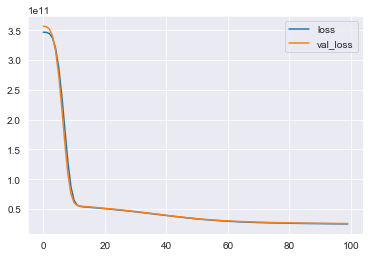

In [24]:
pd.DataFrame(model.history.history).plot()

# Evaluating the Deep Learning model

In [25]:
predictions = model.predict(X_test)

In [26]:
print('Mean Absolut Error = ', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Explained Variance Score = ', str((explained_variance_score(y_test, predictions)*100))[0:5],'%')

Mean Absolut Error =  110066.24196874391
Root Mean Squared Error =  159778.40451557664


Explained Variance Score =  69.01 %


In [27]:
mean_absolute_error(y_test, predictions) / df['price'].mean()

0.21233245937439024

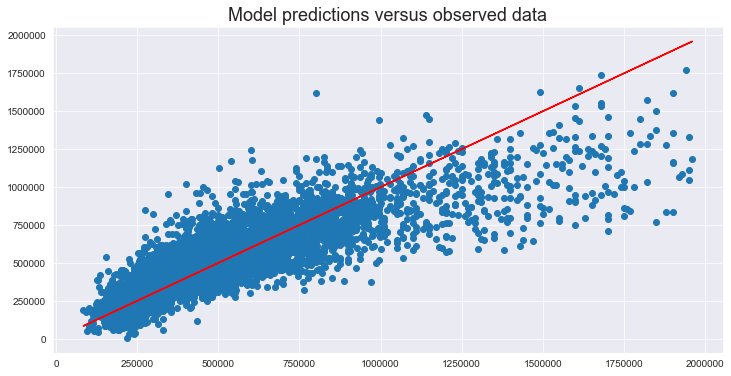

In [28]:
plt.figure(figsize=(12,6))
plt.title('Model predictions versus observed data', fontsize=18)
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')